In [1]:
import numpy as np
import pandas as pd

In [2]:
#load dataset
dataset = pd.read_csv("diabetes.csv")

In [3]:
df = dataset.copy()

In [4]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#Overview of Dataset Characteristics
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
#Show Key Statistics
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
X = dataset.drop('Outcome', axis = 1)
Y = dataset['Outcome']

In [9]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [10]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [12]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
464,10,115,98,0,0,24.0,1.022,34
223,7,142,60,33,190,28.8,0.687,61
393,4,116,72,12,87,22.1,0.463,37
766,1,126,60,0,0,30.1,0.349,47
570,3,78,70,0,0,32.5,0.270,39
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26
106,1,96,122,0,0,22.4,0.207,27
270,10,101,86,37,0,45.6,1.136,38
435,0,141,0,0,0,42.4,0.205,29


## Standardization

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler=StandardScaler()
X_train_ss=scaler.fit_transform(X_train)

In [16]:
X_train_ss

array([[ 1.89917664, -0.19475093,  1.55717838, ..., -1.04293476,
         1.60661512,  0.06905859],
       [ 0.98286551,  0.64046336, -0.55496107, ..., -0.4148062 ,
         0.62609815,  2.37289284],
       [ 0.06655438, -0.16381707,  0.11203033, ..., -1.29156898,
        -0.02953111,  0.32504017],
       ...,
       [ 1.89917664, -0.62782501,  0.89018698, ...,  1.78364376,
         1.94028358,  0.41036736],
       [-1.1551938 ,  0.6095295 , -3.88991811, ...,  1.36489138,
        -0.78467552, -0.35757739],
       [-1.1551938 ,  0.11458769,  1.44601315, ..., -1.23922494,
        -0.61784129, -1.04019494]])

In [17]:
X_test_ss=scaler.transform(X_test)

In [18]:
X_test_ss

array([[ 0.67742846, -0.7206266 , -0.66612631, ...,  0.2656664 ,
        -0.12611934,  0.83700334],
       [-0.54431971, -0.28755252,  0.27877819, ...,  0.4881286 ,
        -0.95150975, -1.04019494],
       [-0.54431971, -0.41128797, -0.3326306 , ..., -0.15308597,
        -0.92224058, -1.04019494],
       ...,
       [-0.84975676, -3.75214514,  0.22319557, ..., -0.55875233,
        -0.50954538, -1.04019494],
       [ 1.28830255,  0.67139722, -0.22146537, ...,  0.38344051,
        -1.00712116,  0.66634895],
       [-0.54431971, -0.62782501, -0.66612631, ..., -1.01676274,
         0.41243326, -0.86954055]])

In [21]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler(feature_range=(0, 1))
dataset_mm=pd.DataFrame(mm.fit_transform(X_train))
dataset_mm.head()

,0,1,2,3,4,5,6,7
0,0.588235,0.577889,0.803279,0.000000,0.000000,0.357675,0.403074,0.216667
1,0.411765,0.713568,0.491803,0.523810,0.224586,0.429210,0.260034,0.666667
2,0.235294,0.582915,0.590164,0.190476,0.102837,0.329359,0.164389,0.266667
3,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333
4,0.176471,0.391960,0.573770,0.000000,0.000000,0.484352,0.081981,0.300000


## Transformations

In [13]:
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab
import numpy as np

In [31]:
def QQ(dataset,fe):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    dataset[fe].hist()
    plt.subplot(1,2,2)
    stat.probplot(dataset[fe],dist='norm',plot=pylab)
    plt.show()

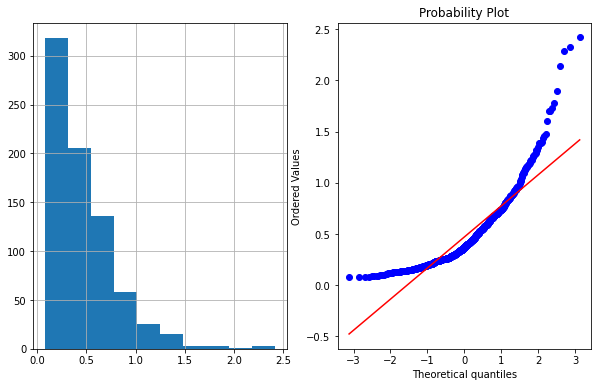

In [32]:
QQ(dataset,'DiabetesPedigreeFunction')

### Logarithmic transformation

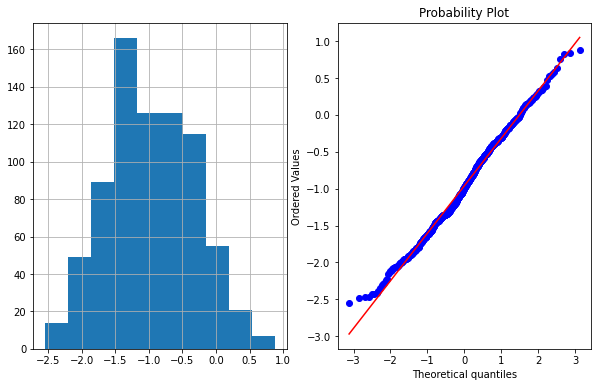

In [33]:
dataset['DiabetesPedigreeFunction_l']=np.log(dataset['DiabetesPedigreeFunction'])
QQ(dataset,'DiabetesPedigreeFunction_l')

### Reciprocal transformation

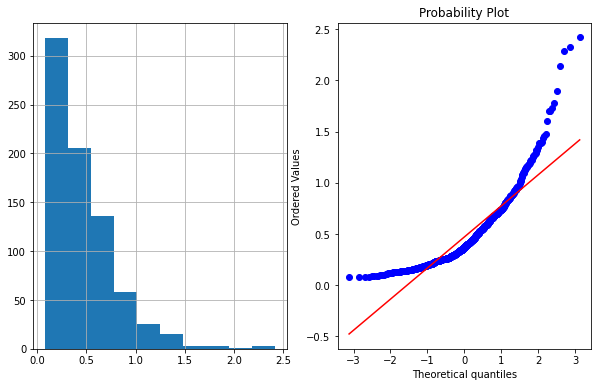

In [37]:
dataset['DiabetesPedigreeFunction_r']=1/dataset.DiabetesPedigreeFunction
plot_data(dataset,'DiabetesPedigreeFunction_r')

### Square root transformation

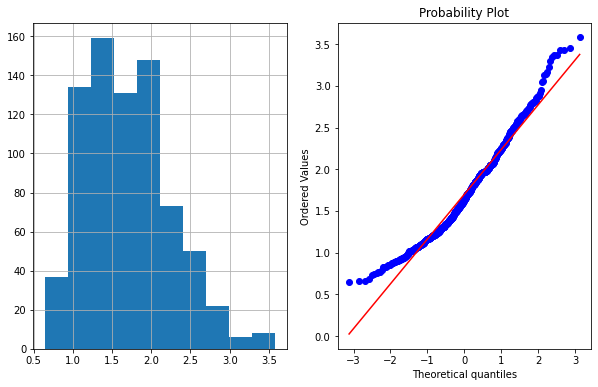

In [38]:
dataset['DiabetesPedigreeFunction_s']=dataset.DiabetesPedigreeFunction**(1/2)
plot_data(dataset,'DiabetesPedigreeFunction_s')

### Exponential transformation 

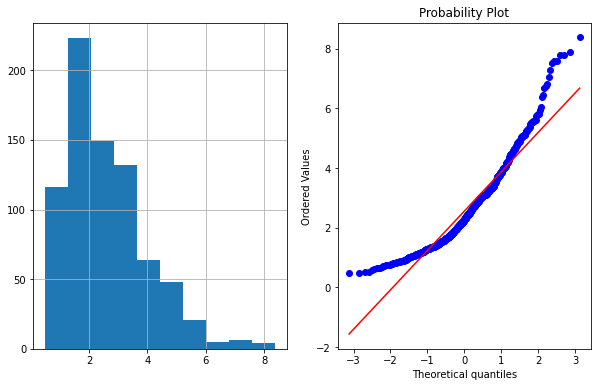

In [39]:
dataset['DiabetesPedigreeFunction_e']=dataset.DiabetesPedigreeFunction**(1/1.2)
plot_data(dataset,'DiabetesPedigreeFunction_e')

### Boxcox transformation

In [41]:
dataset['DiabetesPedigreeFunction_b'],parameters=stat.boxcox(dataset['DiabetesPedigreeFunction'])
parameters

0.07310845400664297

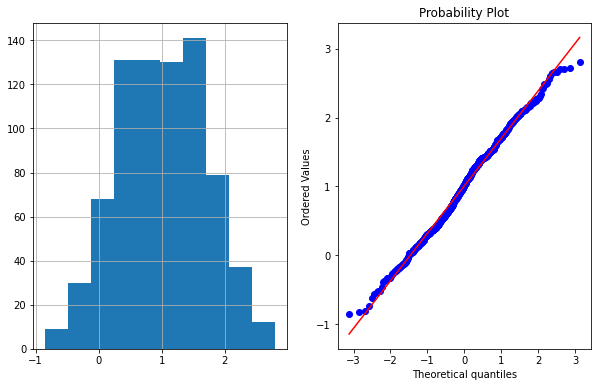

In [42]:
plot_data(dataset,'DiabetesPedigreeFunction_b')

## Robust Scaler

In [47]:
from sklearn.preprocessing import RobustScaler
rs=RobustScaler(quantile_range=(25.0, 75.0))
dataset_r=pd.DataFrame(rs.fit_transform(X_train))
dataset_r.head()

,0,1,2,3,4,5,6,7
0,1.4,-0.048780,1.625,-0.71875,-0.270378,-0.835509,1.724510,0.294118
1,0.8,0.609756,-0.750,0.31250,1.240557,-0.334204,0.819716,1.882353
2,0.2,-0.024390,0.000,-0.34375,0.421471,-1.033943,0.214720,0.470588
3,-0.4,0.219512,-0.750,-0.71875,-0.270378,-0.198433,-0.093180,1.058824
4,0.0,-0.951220,-0.125,-0.71875,-0.270378,0.052219,-0.306550,0.588235


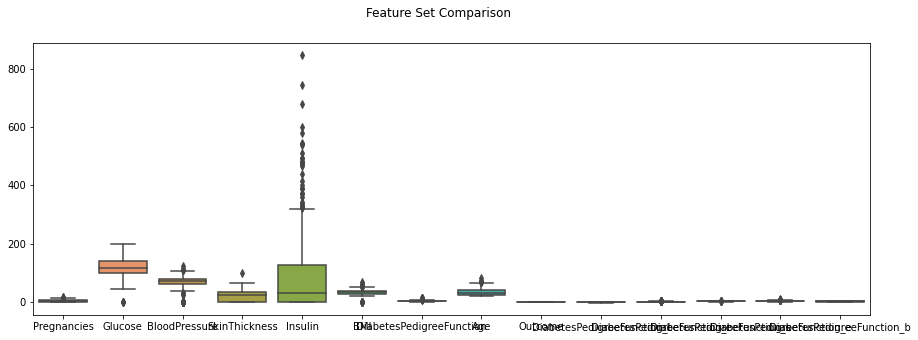

In [48]:
import seaborn as sns
fig = plt.figure(figsize=(15,5))
fig.suptitle('Feature Set Comparison')
ax = fig.add_subplot(111)
sns.boxplot(data=dataset)
plt.show()

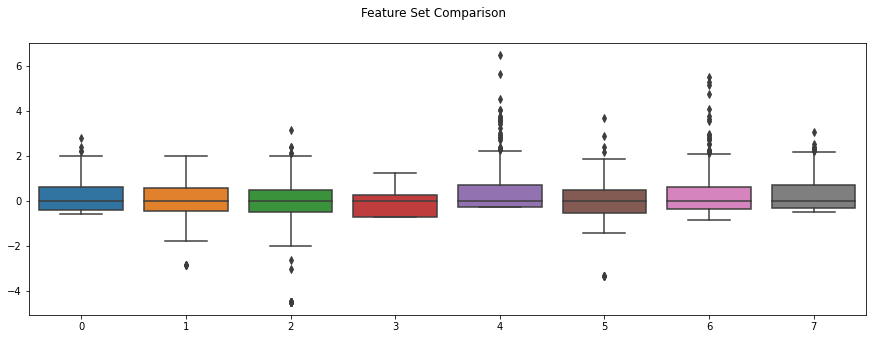

In [49]:
fig = plt.figure(figsize=(15,5))
fig.suptitle('Feature Set Comparison')
ax = fig.add_subplot(111)
sns.boxplot(data=dataset_r)
plt.show()